# Regression with Machine Learning
## Random numbers
[Max Pagels, "What is Online Machine Learning?", Apr 20, 2018

https://medium.com/value-stream-design/online-machine-learning-515556ff72c5]

In [14]:
%reset -f

In [15]:
import numpy as np
from sklearn import linear_model
n_samples, n_features = 10, 5
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = linear_model.SGDRegressor()
clf.fit(X, y)

SGDRegressor()

In [16]:
X # 5 features, 10 samples

array([[ 0.52507017,  0.31105106, -1.90290702,  0.4390847 , -0.38087905],
       [ 0.33506284,  0.20782376,  1.48327699,  1.94217375,  1.06749719],
       [-0.33514192, -1.5181761 ,  1.99196849,  0.40177028, -0.12717096],
       [ 0.47700792,  0.49942312, -1.04115773,  0.51225783,  0.44243791],
       [-1.34508497, -0.86872718,  0.59601186,  1.23947051, -0.02845676],
       [-0.12950413, -0.55006643, -1.05686422, -0.24071754,  1.31569849],
       [ 0.51496419, -0.11417358, -0.40475571, -0.78654387, -1.58327794],
       [ 0.27908715,  0.121572  ,  0.12449937, -0.19792013, -1.42538822],
       [-0.88033262,  2.0517154 , -0.43587301, -0.98164216, -1.06857119],
       [ 0.41096267,  1.05917507, -0.07901609,  0.69092954, -1.22541916]])

In [17]:
y

array([ 1.74545973, -0.33805475, -0.68953697,  1.43106543, -0.38563525,
       -1.21913137,  0.07384796, -1.18453015,  1.51877223, -0.39655419])

The `fit()` method does all the training magic, resulting in a model we can use for prediction (in this case, predicting on one example):

In [18]:
# make prediction for this set of features:
features = np.random.randn(1, n_features)
print(features)
clf.predict(features)

[[ 0.92788533  0.78950449 -1.15141345 -0.61159268 -0.17164461]]


array([0.61247133])

In addition to the `fit()` method, the SGDRegressor also provides a `partial_fit()` method, so that you can incrementally train on small batches of data. In fact, all learning algorithms that are compatible with standard optimisation algorithms like (stochastic) gradient decent, adam, RMSprop, and so on have this capability.

Out of curiosity, let’s see how long it takes to train on a single example using `partial_fit()`:

In [22]:
#import numpy as np
#from sklearn import linear_model
n_samples, n_features = 1, 500
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = linear_model.SGDRegressor()
import time
start_time = time.time()
clf.partial_fit(X, y)
elapsed_time = time.time() - start_time
print("%.6f" % elapsed_time)

0.001034


That’s quite fast. In fact, if we were to put our SGDRegressor behind a REST API and train on an example each time an HTTP request was made, factoring in, say, 10ms for request processing, we could handle about 520 requests a second, or about 45 million requests a day.

## BRFSS
y - continuous, X - numeric and categorical

In [23]:
import os
os.chdir('C:/Sereda/Lectures/Springboard/13.Machine_Learning_Overview/')

In [24]:
import pandas as pd
df = pd.read_csv('BRFSS_2018_v2.csv')
df.head()
# Income vs. years of experience, attended college, province

,income,exp,college,geog
0,68666.665724,11,1,AB
1,58200.564681,30,1,ON
2,57723.268424,30,1,QC
3,50434.512838,15,1,QC
4,33479.741603,8,1,ON


In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
geog = label_encoder.fit_transform(df['geog'])
print(geog)

[0 2 3 ... 1 2 3]


In [74]:
#import numpy as np
#from sklearn import linear_model
y = df['income']
X = df.iloc[:,1:2+1]
print(X.head())
n_samples, n_features = y.shape[0], X.shape[1]
clf = linear_model.SGDRegressor()
clf.fit(X, y)

   exp  college
0   11        1
1   30        1
2   30        1
3   15        1
4    8        1


SGDRegressor()

In [79]:
features = np.random.randn(1, n_features)
print(features)
clf.predict(features)

[[ 1.07544559 -0.48806149]]


array([29054.91291858])

In [82]:
features = [[21, 1]]
clf.predict(features)

array([61044.733285])

In [81]:
features = [[21, 0]]
clf.predict(features)

array([56912.40001802])

Makes sense. Let's add a province.

In [102]:
#import numpy as np
#from sklearn import linear_model
y = df['income']
df['geog'] = geog
X = df.iloc[:,1:]
print(X.head())
n_samples, n_features = y.shape[0], X.shape[1]
clf = linear_model.SGDRegressor()
clf.fit(X, y)

   exp  college  geog
0   11        1     0
1   30        1     2
2   30        1     3
3   15        1     3
4    8        1     2


SGDRegressor()

In [103]:
X

,exp,college,geog
0,11,1,0
1,30,1,2
2,30,1,3
3,15,1,3
4,8,1,2
...,...,...,...
25316,3,1,3
25317,35,0,2
25318,17,1,1
25319,10,1,2


In [105]:
features = [[21, 0, 3]]
clf.predict(features)

array([60715.13552546])

In [106]:
features = [[21, 1, 3]]
clf.predict(features)

array([64868.32656218])

## Violent crimes
Guns is a balanced panel of data on 50 US states, plus the District of Columbia (for a total of 51 “states”), by year for 1977 – 1999. Each observation is a given state in a given year. There are a total of 51 states × 23 years = 1173 observations. These data were provided by Professor John Donohue of Stanford University and were used in his paper with Ian Ayres “Shooting Down the ‘More Guns Less Crime’ Hypothesis” Stanford Law Review, 2003, Vol. 55, 1193-1312.

Variables:

year: 1977-1999

incarc_rate: incarceration rate in the state in the previous year (sentenced prisoners per 100,000 residents; value for the previous year)

pb1064: percent of state population that is black, ages 10 to 64

pw1064: percent of state population that is white, ages 10 to 64

pm1029: percent of state population that is male, ages 10 to 29

pop: state population, in millions of people

avginc: real per capita personal income in the state, in thousands of dollars

density: population per square mile of land area, divided by 1000

stateid: ID number of states (Alabama = 1, Alaska = 2, etc.)

[Stock and Watson’s Introduction to Econometrics, 3rd Updated Edition]

In [ ]:
import pandas as pd
df = pd.read_csv('violent_crimes.csv')
df.head()

https://medium.com/value-stream-design/online-machine-learning-515556ff72c5

Usual starting point is the SGDRegressor class.

In [ ]:
import numpy as np
from sklearn import linear_model
y = df['vio'] # violent crime rate (incidents per 100,000 members of the population)
X = df.iloc[:,1:]
#X = df.iloc[:,1:2+1];
print(X.head())
n_samples, n_features = y.shape[0], X.shape[1]
clf = linear_model.SGDRegressor()
clf.fit(X, y)

The fit() method does all the training magic, resulting in a model we can use for prediction:

In [ ]:
fp = df.iloc[-1] # features previous
print(fp)

In [ ]:
features = np.array([[fp.year+1, fp.incarc_rate, fp.pb1064, fp.pw1064, fp.pm1029, fp['pop'], fp.avginc,fp.density, fp.stateid, fp.shall]]) # year = 2000
#features = np.array([[fp.year+1, fp.year, fp.incarc_rate]])
features

In [65]:
clf.predict(features)

array([-3.17216627e+12])

Invalid prediction. What is going on?

In [77]:
?linear_model.SGDRegressor

In [54]:
clf = linear_model.SGDRegressor(max_iter=1e9)
clf.fit(X, y)
clf.predict(features)

array([-6.4594364e+13])

In [ ]:
This is just a random result.

In [47]:
import matplotlib.pyplot as plt

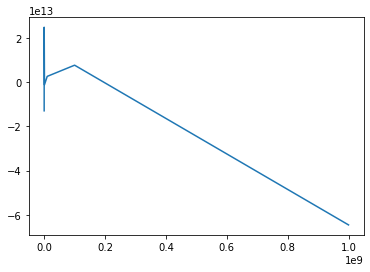

In [55]:
max_iter = np.array([10000, 100000, 1000000, 1e7, 1e8, 1e9])
predict = np.array([-1.30144833e+13, 2.47608347e+13, -1.23645388e+12, 2.54771214e+12,7.60691955e+12,-6.4594364e+13])
plt.plot(max_iter, predict);